In [1]:
%matplotlib inline
#Imports required to run

from matplotlib.pylab import *
import matplotlib.pylab as plt
import numpy as np

#Imports from ICgen-Binary directory
import os
sys.path.append('/astro/users/dflemin3/Desktop/ICgen')
sys.path.append('/astro/users/dflemin3/Desktop')
import isaac
import AddBinary
import binaryUtils

#Typical plot parameters that make for pretty plots
plt.rcParams['figure.figsize'] = (10,8)
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=20, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0

/astro/users/dflemin3/Desktop/ICgen/isaac.pyc


In [2]:
#Times
rand_control_time = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

rand_lowEcc_time = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

rand_lowEccMassive_time = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

rand_short_time = [  0.        ,   0.07472519,   0.14945037,   0.22417556,
         0.29890075,   0.37362593,   0.44835112,   0.52307631,
         0.59780149,   0.67252668,   0.74725187,   0.82197705,
         0.89670224,   0.97142743,   1.04615261,   1.1208778 ,
         1.19560299,   1.27032817,   1.34505336,   1.41977855,
         1.49450373,   1.56922892,   1.64395411,   1.71867929,
         1.79340448,   1.86812967,   1.94285485,   2.01758004,
         2.09230523,   2.16703041,   2.2417556 ,   2.31648079,
         2.39120597,   2.46593116,   2.54065635,   2.61538153,
         2.69010672,   2.76483191,   2.83955709,   2.91428228,
         2.98900747,   3.06373265,   3.13845784,   3.21318303,
         3.28790821,   3.3626334 ,   3.43735859,   3.51208377,
         3.58680896,   3.66153415,   3.73625933,   3.81098452,
         3.88570971,   3.96043489,   4.03516008,   4.10988527,
         4.18461045,   4.25933564,   4.33406083,   4.40878602,
         4.4835112 ,   4.55823639,   4.63296158,   4.70768676,
         4.78241195,   4.85713714,   4.93186232,   5.00658751,
         5.0813127 ,   5.15603788,   5.23076307,   5.30548826,
         5.38021344,   5.45493863,   5.52966382,   5.604389  ,
         5.67911419,   5.75383938,   5.82856456,   5.90328975,
         5.97801494,   6.05274012,   6.12746531,   6.2021905 ,
         6.27691568,   6.35164087,   6.42636606,   6.50109124,
         6.57581643,   6.65054162,   6.7252668 ,   6.79999199,
         6.87471718,   6.94944236,   7.02416755,   7.09889274,
         7.17361792,   7.24834311,   7.3230683 ,   7.39779348,
         7.47251867,   7.54724386,   7.62196904,   7.69669423,
         7.77141942,   7.8461446 ,   7.92086979,   7.99559498,
         8.07032016,   8.14504535,   8.21977054,   8.29449572,
         8.36922091,   8.4439461 ,   8.51867128,   8.59339647,
         8.66812166,   8.74284684,   8.81757203,   8.89229722,
         8.9670224 ,   9.04174759,   9.11647278,   9.19119796,
         9.26592315,   9.34064834,   9.41537352,   9.49009871,
         9.5648239 ,   9.63954908,   9.71427427,   9.78899946,
         9.86372464,   9.93844983,  10.01317502,  10.0879002 ,
        10.16262539,  10.23735058,  10.31207576,  10.38680095,
        10.46152614,  10.53625132,  10.61097651,  10.6857017 ,
        10.76042688,  10.83515207,  10.90987726,  10.98460244,
        11.05932763,  11.13405282,  11.208778  ,  11.28350319,
        11.35822838,  11.43295356,  11.50767875,  11.58240394,
        11.65712912,  11.73185431,  11.8065795 ,  11.88130468,
        11.95602987,  12.03075506,  12.10548024,  12.18020543,
        12.25493062,  12.3296558 ,  12.40438099,  12.47910618,
        12.55383136,  12.62855655,  12.70328174,  12.77800692,
        12.85273211,  12.9274573 ,  13.00218249,  13.07690767,
        13.15163286,  13.22635805,  13.30108323,  13.37580842,
        13.45053361,  13.52525879,  13.59998398,  13.67470917,
        13.74943435,  13.82415954,  13.89888473,  13.97360991,
        14.0483351 ,  14.12306029,  14.19778547,  14.27251066,
        14.34723585,  14.42196103,  14.49668622,  14.57141141,
        14.64613659,  14.72086178,  14.79558697,  14.87031215,
        14.94503734,  15.01976253,  15.09448771,  15.1692129 ,
        15.24393809,  15.31866327]

#Plot Binary/Disk CoM vs Time

In [3]:
rand_control_binComX = [  7.98482687e-10,   6.08413040e-06,   6.44823766e-06,
         3.48632492e-06,  -4.07099678e-06,  -2.39413452e-05,
        -4.07852361e-05,  -4.26573596e-05,  -5.10798638e-05,
        -6.90100278e-05,  -8.96923683e-05,  -1.03683331e-04,
        -1.10559124e-04,  -1.25216583e-04,  -1.34320194e-04,
        -1.51630104e-04,  -1.68642687e-04,  -1.83036224e-04,
        -1.93562258e-04,  -2.09109809e-04,  -2.16999608e-04,
        -2.27420267e-04,  -2.39645693e-04,  -2.48553248e-04,
        -2.53146488e-04,  -2.63093039e-04,  -2.75753773e-04,
        -2.96375343e-04,  -3.10600326e-04,  -3.28475243e-04,
        -3.43971220e-04,  -3.69930201e-04,  -3.87348638e-04,
        -3.97646128e-04,  -4.15803724e-04,  -4.35286149e-04,
        -4.55398088e-04,  -4.82223458e-04,  -5.09973426e-04,
        -5.39689301e-04,  -5.61548571e-04,  -5.83045169e-04,
        -5.98301763e-04,  -6.09985672e-04,  -6.26775866e-04,
        -6.52644478e-04,  -6.68533603e-04,  -6.85021388e-04,
        -6.94236057e-04,  -7.16380819e-04,  -7.36380698e-04,
        -7.69355876e-04,  -8.00214034e-04,  -8.29496436e-04,
        -8.57834901e-04,  -8.76901016e-04,  -8.94612374e-04,
        -9.15231243e-04,  -9.31239243e-04,  -9.49211177e-04,
        -9.69775395e-04,  -9.90738022e-04,  -1.01445082e-03,
        -1.04095980e-03,  -1.07258208e-03,  -1.10065042e-03,
        -1.12565946e-03,  -1.14783836e-03,  -1.16536433e-03,
        -1.19134334e-03,  -1.21104850e-03,  -1.22424938e-03,
        -1.24296267e-03,  -1.26797557e-03,  -1.30328602e-03,
        -1.34060485e-03,  -1.37651866e-03,  -1.40642081e-03,
        -1.43719687e-03,  -1.47045251e-03,  -1.50375298e-03,
        -1.53492985e-03,  -1.56639449e-03,  -1.59453557e-03,
        -1.61426517e-03,  -1.64188966e-03,  -1.67394310e-03,
        -1.70775117e-03,  -1.74420760e-03,  -1.77959094e-03,
        -1.81568874e-03,  -1.84588392e-03,  -1.87860958e-03,
        -1.91177936e-03,  -1.94611445e-03,  -1.98564890e-03,
        -2.02017130e-03,  -2.04712719e-03,  -2.08578347e-03,
        -2.11812500e-03,  -2.15063013e-03,  -2.18696979e-03,
        -2.22543205e-03,  -2.26879708e-03,  -2.30954334e-03,
        -2.33781070e-03,  -2.37641899e-03,  -2.40352804e-03,
        -2.44083490e-03,  -2.47859637e-03,  -2.52693898e-03,
        -2.57241986e-03,  -2.61517352e-03,  -2.65581162e-03,
        -2.70286355e-03,  -2.74972084e-03,  -2.78872301e-03,
        -2.82716666e-03,  -2.86724205e-03,  -2.90626417e-03,
        -2.94883496e-03,  -2.98581082e-03,  -3.02876092e-03,
        -3.07643501e-03,  -3.11970680e-03,  -3.15016571e-03,
        -3.19245252e-03,  -3.23138385e-03,  -3.27034450e-03,
        -3.30120154e-03,  -3.33633925e-03,  -3.37750063e-03,
        -3.42648105e-03,  -3.46204557e-03,  -3.50597836e-03,
        -3.55103720e-03,  -3.59822175e-03,  -3.64614045e-03,
        -3.70147761e-03,  -3.74829173e-03,  -3.78699645e-03,
        -3.83243524e-03,  -3.88167902e-03,  -3.93054441e-03,
        -3.97488768e-03,  -4.02663616e-03,  -4.08995150e-03,
        -4.15328946e-03,  -4.20692740e-03,  -4.26103641e-03,
        -4.31569761e-03,  -4.37234277e-03,  -4.43108882e-03,
        -4.49195868e-03,  -4.55330969e-03,  -4.61132296e-03,
        -4.67134794e-03,  -4.72652006e-03,  -4.78036719e-03,
        -4.83479098e-03,  -4.89198932e-03,  -4.96201537e-03,
        -5.01523018e-03,  -5.07078552e-03,  -5.12794987e-03,
        -5.19470411e-03,  -5.26663948e-03,  -5.33318126e-03,
        -5.39896328e-03,  -5.46178271e-03,  -5.51951722e-03,
        -5.57320413e-03,  -5.63057248e-03,  -5.68620798e-03,
        -5.74711006e-03,  -5.80861789e-03,  -5.87822991e-03,
        -5.94875324e-03,  -6.00964112e-03,  -6.07317341e-03,
        -6.13393480e-03,  -6.18510777e-03,  -6.24497401e-03,
        -6.30828981e-03,  -6.37527681e-03,  -6.43841116e-03,
        -6.49923700e-03,  -6.56081634e-03,  -6.63182307e-03,
        -6.71015684e-03,  -6.78487263e-03,  -6.85498640e-03,
        -6.91278160e-03,  -6.97020835e-03,  -7.03125297e-03,
        -7.08585492e-03,  -7.14541688e-03,  -7.21221023e-03,
        -7.28075774e-03]

rand_control_cutComX = [ 0.01226561,  0.01467539,  0.02176854,  0.02117716,  0.04332339,
        0.03480013,  0.03989529,  0.03980461,  0.02693792,  0.03953481,
        0.03079813,  0.01778067, -0.00804984,  0.00937098,  0.00631671,
       -0.0137486 , -0.03247214, -0.02070726, -0.0185063 , -0.03465131,
       -0.03474734, -0.03789718, -0.02888034, -0.01395098, -0.01859036,
       -0.00433106,  0.01187447,  0.0010254 ,  0.01674636,  0.02970185,
        0.0143914 ,  0.04356059,  0.03361395,  0.03470031,  0.03776564,
        0.02343145,  0.01489027,  0.02587692,  0.01121953,  0.00682181,
       -0.01915244, -0.01017481, -0.01830475, -0.02671636, -0.03118619,
       -0.02000321, -0.01975823, -0.0236624 , -0.01227855, -0.01035313,
        0.00911021,  0.0046349 ,  0.02016292,  0.02137634,  0.00579224,
        0.03432568,  0.01832368,  0.03219074, -0.00570357,  0.0428497 ,
        0.01422711,  0.0121159 ,  0.00693316, -0.000449  ,  0.00833404,
        0.007889  , -0.01633617, -0.0032592 , -0.02248641, -0.00779799,
       -0.02475381, -0.00543603, -0.01354756, -0.00428694,  0.00868524,
        0.013297  ,  0.00144161,  0.00353824,  0.0200817 ,  0.02331854,
        0.02353519,  0.01931331,  0.02968476,  0.02208691,  0.01639828,
        0.0076309 ,  0.02199269,  0.00872152, -0.00801896,  0.00299727,
       -0.01206609, -0.0060361 , -0.02297057, -0.0084667 , -0.00931217,
       -0.00700986,  0.0037843 ,  0.00927347, -0.00598829,  0.00571958,
        0.00871484,  0.0132908 ,  0.00450839,  0.01160017,  0.0283831 ,
        0.01308739,  0.02219287,  0.00631673,  0.01762267,  0.00996179,
        0.01511211,  0.01475954,  0.02257247,  0.01457152,  0.01832428,
        0.00550702, -0.00307073,  0.0009569 , -0.01515493,  0.00398596,
       -0.01561033, -0.00152235, -0.0053043 , -0.00589868,  0.00192412,
        0.00425816,  0.01238549, -0.00305815,  0.0085899 ,  0.00292552,
        0.01538439,  0.0195968 ,  0.01686793,  0.01425624,  0.02091721,
        0.03332623,  0.00563314,  0.00912346,  0.00852915,  0.00874543,
        0.00960273,  0.00725444,  0.00423307,  0.02814367,  0.01780733,
        0.0051403 ,  0.01441621,  0.01640845,  0.00944234,  0.00988818,
        0.00314072,  0.01213305,  0.01980712,  0.01857494,  0.01157098,
        0.02867655,  0.01987264,  0.03517924,  0.00227996,  0.01250963,
        0.0074704 ,  0.01983813,  0.01327559,  0.01359156,  0.02422204,
        0.00909953,  0.03746442,  0.00239393,  0.04014139,  0.01483761,
        0.02492426,  0.00707781,  0.0120234 ,  0.00635945,  0.01101855,
       -0.01473163,  0.00646853,  0.01298247,  0.00640104,  0.02539693,
        0.02454672,  0.02503096,  0.04491463,  0.02692048,  0.02827596,
        0.02123459,  0.02583137,  0.02582961,  0.02242795,  0.01749265,
        0.01802859,  0.01359901,  0.00897835,  0.02058961,  0.02022622,
        0.01707739,  0.00909474,  0.024748  ,  0.0188962 ]

rand_lowEcc_cutComX = [-0.0008023 , -0.02498251, -0.01246996,  0.00107095,  0.0276742 ,
        0.03008811,  0.00569925, -0.02784439, -0.00850585, -0.00030644,
       -0.04173326, -0.05068698, -0.03314387, -0.04702238,  0.01333836,
        0.02571593,  0.07257694,  0.12304754,  0.14061538,  0.1642261 ,
        0.21702013,  0.20369939,  0.215293  ,  0.20224834,  0.22311368,
        0.20831892,  0.19102979,  0.16559769,  0.09570272,  0.09192477,
        0.05862499,  0.03474708, -0.03400568, -0.05254858, -0.09480196,
       -0.14996526, -0.1893326 , -0.21190065, -0.22640652, -0.23789736,
       -0.24694204, -0.26216265, -0.26327381, -0.24802019, -0.25515926,
       -0.23404929, -0.24022634, -0.19439439, -0.15157511, -0.10911254,
       -0.13405277, -0.07789746, -0.00855888,  0.00356842,  0.05800826,
        0.03068535,  0.12454507,  0.1465881 ,  0.19161127,  0.19081318,
        0.24114153,  0.2417385 ,  0.24737216,  0.27936204,  0.26296022,
        0.25742108,  0.2564508 ,  0.24424424,  0.22959588,  0.22870296,
        0.20820042,  0.13531509,  0.11842068,  0.08838263,  0.05488733,
        0.0280864 , -0.02950936, -0.03324535, -0.07764748, -0.1157763 ,
       -0.15127932, -0.19799619, -0.21576959, -0.2164256 , -0.25233515,
       -0.25837794, -0.29062078, -0.26506919, -0.28534845, -0.26794679,
       -0.27688207, -0.24270365, -0.2379523 , -0.22538061, -0.18751909,
       -0.15171407, -0.12963444, -0.10022033, -0.0788459 , -0.01156547,
        0.05308352,  0.03785756,  0.10030745,  0.10378341,  0.17231005,
        0.17754172,  0.18604029,  0.23824771,  0.24775587,  0.27188826,
        0.27729716,  0.27252373,  0.28415272,  0.28698767,  0.26164668,
        0.2476074 ,  0.21254057,  0.25223102,  0.18265482,  0.16628478,
        0.13010735,  0.09652788,  0.06274058,  0.01238332, -0.0054934 ,
       -0.01783238, -0.0543507 , -0.1119652 , -0.15696419, -0.16717814,
       -0.22820164, -0.23967636, -0.25246563, -0.24395807, -0.27734641,
       -0.2914522 , -0.2685021 , -0.29103302, -0.27765048, -0.27936197,
       -0.25766177, -0.24098862, -0.20643158, -0.19309944, -0.1712195 ,
       -0.1104294 , -0.10363488, -0.02554149, -0.06687465,  0.02188849,
        0.04369956,  0.0585767 ,  0.12223311,  0.12722277,  0.18646753,
        0.21896825,  0.19327022,  0.26851907,  0.26700667,  0.27155464,
        0.27627078,  0.2966091 ,  0.30462323,  0.25995606,  0.27430892,
        0.26584729,  0.25278258,  0.23393903,  0.20043405,  0.16261578,
        0.15053518,  0.12223032,  0.06590582,  0.02383187,  0.02398728,
       -0.02356613, -0.0622873 , -0.13407642, -0.12845083, -0.16845321,
       -0.20155628, -0.21136819, -0.25976694, -0.24451334, -0.2613146 ,
       -0.29046   , -0.27155588, -0.29273077, -0.28231282, -0.29768627,
       -0.28460198, -0.23439194, -0.24216117, -0.22964253, -0.19942922,
       -0.17952647, -0.11472011, -0.14587784, -0.07103165]

rand_lowEcc_comBinX = [  9.21067156e-11,   9.52307257e-06,   1.94862049e-05,
         1.50008614e-05,   8.47891416e-06,   4.98096040e-06,
        -2.01367693e-06,  -1.29131533e-05,  -1.93656292e-05,
        -2.31153612e-05,  -1.01342071e-05,   3.25855162e-06,
         1.14419527e-05,   2.10957677e-05,   2.67950809e-05,
         3.63831312e-05,   3.59182152e-05,   2.57843638e-05,
         1.49125344e-05,   2.03383382e-06,  -1.68643641e-05,
        -3.52511757e-05,  -5.12496758e-05,  -6.40865965e-05,
        -7.77454201e-05,  -9.66904397e-05,  -1.13377683e-04,
        -1.25365484e-04,  -1.36049377e-04,  -1.55815761e-04,
        -1.73894762e-04,  -1.88671287e-04,  -2.01693644e-04,
        -2.12749548e-04,  -2.17692167e-04,  -2.22657803e-04,
        -2.23306547e-04,  -2.24020344e-04,  -2.31121206e-04,
        -2.23245292e-04,  -2.20204846e-04,  -2.11570699e-04,
        -2.11530119e-04,  -2.13700535e-04,  -2.01384929e-04,
        -1.84232410e-04,  -1.73328780e-04,  -1.60023341e-04,
        -1.46853106e-04,  -1.38581388e-04,  -1.29176083e-04,
        -1.20524134e-04,  -1.16682200e-04,  -1.10669479e-04,
        -1.16293822e-04,  -1.18598984e-04,  -1.12906311e-04,
        -1.11348080e-04,  -1.16948496e-04,  -1.34266975e-04,
        -1.43658043e-04,  -1.47772211e-04,  -1.54491727e-04,
        -1.70471358e-04,  -1.87731257e-04,  -2.03981768e-04,
        -2.19811767e-04,  -2.31684701e-04,  -2.39201295e-04,
        -2.60376241e-04,  -2.79206618e-04,  -2.83389360e-04,
        -2.91089214e-04,  -3.06485142e-04,  -3.24991456e-04,
        -3.28620986e-04,  -3.37659961e-04,  -3.44760560e-04,
        -3.49526427e-04,  -3.55223514e-04,  -3.53101010e-04,
        -3.52592763e-04,  -3.49367064e-04,  -3.33809459e-04,
        -3.15212768e-04,  -3.03960789e-04,  -2.93177244e-04,
        -2.82343849e-04,  -2.74948235e-04,  -2.60407780e-04,
        -2.37460289e-04,  -2.18909042e-04,  -2.06243131e-04,
        -1.89937981e-04,  -1.75668543e-04,  -1.67102316e-04,
        -1.47192515e-04,  -1.30208923e-04,  -1.19689819e-04,
        -1.03667605e-04,  -9.19095284e-05,  -8.71237023e-05,
        -8.04535071e-05,  -7.42816282e-05,  -8.03217600e-05,
        -8.65092644e-05,  -8.75423173e-05,  -9.34976545e-05,
        -1.02347826e-04,  -1.13773516e-04,  -1.26694665e-04,
        -1.34429756e-04,  -1.45312585e-04,  -1.52760938e-04,
        -1.64290019e-04,  -1.79186637e-04,  -1.97016560e-04,
        -2.14253258e-04,  -2.26648563e-04,  -2.43834613e-04,
        -2.56622163e-04,  -2.72889890e-04,  -2.88769518e-04,
        -3.04425017e-04,  -3.10786888e-04,  -3.08779458e-04,
        -3.14988204e-04,  -3.12401651e-04,  -3.20477930e-04,
        -3.23894075e-04,  -3.21606701e-04,  -3.17186430e-04,
        -3.11403509e-04,  -2.99804769e-04,  -2.93340534e-04,
        -2.83331416e-04,  -2.76541107e-04,  -2.72984654e-04,
        -2.54753883e-04,  -2.49174944e-04,  -2.46963845e-04,
        -2.29516406e-04,  -2.12364045e-04,  -1.88448002e-04,
        -1.64999033e-04,  -1.39386481e-04,  -1.28711015e-04,
        -1.28822541e-04,  -1.22110943e-04,  -1.26231866e-04,
        -1.23538036e-04,  -1.20856817e-04,  -1.18779312e-04,
        -1.17353871e-04,  -1.15333682e-04,  -1.16743367e-04,
        -1.14577704e-04,  -1.30620050e-04,  -1.43192900e-04,
        -1.54095426e-04,  -1.64552921e-04,  -1.75713034e-04,
        -1.90788487e-04,  -1.92220063e-04,  -1.79745849e-04,
        -1.92410647e-04,  -2.05654251e-04,  -2.20245750e-04,
        -2.41346440e-04,  -2.59751742e-04,  -2.76392913e-04,
        -2.92126706e-04,  -3.00595061e-04,  -3.11230869e-04,
        -3.07326713e-04,  -3.00650742e-04,  -3.05806963e-04,
        -3.14014045e-04,  -3.23651916e-04,  -3.30064566e-04,
        -3.30546602e-04,  -3.23688230e-04,  -3.08918348e-04,
        -2.92025333e-04,  -2.85105966e-04,  -2.79458688e-04,
        -2.75471509e-04,  -2.79489385e-04,  -2.74752830e-04,
        -2.55377623e-04,  -2.29671493e-04,  -2.11739124e-04,
        -2.02132244e-04,  -1.77810207e-04,  -1.70636316e-04,
        -1.65294100e-04,  -1.61267925e-04,  -1.61547541e-04,
        -1.57702683e-04]

rand_lowEccMassive_comBinX = [  9.21067156e-11,  -3.98470385e-05,  -7.67168229e-05,
        -8.96371269e-05,  -1.19600515e-04,  -1.64602988e-04,
        -1.88366590e-04,  -2.05576137e-04,  -2.26894428e-04,
        -2.37929184e-04,  -2.59544107e-04,  -2.94186904e-04,
        -3.24850207e-04,  -3.50678152e-04,  -3.71333455e-04,
        -3.95260280e-04,  -4.12354181e-04,  -4.45289681e-04,
        -4.65292853e-04,  -4.79470607e-04,  -5.01555159e-04,
        -5.31543941e-04,  -5.99408766e-04,  -6.61360403e-04,
        -7.29872976e-04,  -7.82771431e-04,  -8.39059995e-04,
        -8.92567418e-04,  -9.53248919e-04,  -1.00197292e-03,
        -1.04142042e-03,  -1.08959870e-03,  -1.12637036e-03,
        -1.14391467e-03,  -1.17765714e-03,  -1.23671837e-03,
        -1.28033258e-03,  -1.29918538e-03,  -1.31296591e-03,
        -1.34613617e-03,  -1.34440087e-03,  -1.34946718e-03,
        -1.35476030e-03,  -1.38612532e-03,  -1.41495784e-03,
        -1.42876192e-03,  -1.44684333e-03,  -1.46035417e-03,
        -1.45811740e-03,  -1.46177790e-03,  -1.47013199e-03,
        -1.48774456e-03,  -1.51494502e-03,  -1.55031672e-03,
        -1.56498529e-03,  -1.58897557e-03,  -1.62253506e-03,
        -1.64968326e-03,  -1.67490561e-03,  -1.72261252e-03,
        -1.77640257e-03,  -1.82448368e-03,  -1.87504297e-03,
        -1.93367580e-03,  -1.99677482e-03,  -2.04969491e-03,
        -2.10421769e-03,  -2.16831090e-03,  -2.23265986e-03,
        -2.28609152e-03,  -2.33984652e-03,  -2.39028000e-03,
        -2.45113313e-03,  -2.51224538e-03,  -2.55874493e-03,
        -2.60051564e-03,  -2.63653309e-03,  -2.68672712e-03,
        -2.72972297e-03,  -2.75501419e-03,  -2.79962124e-03,
        -2.84531212e-03,  -2.87815828e-03,  -2.88626682e-03,
        -2.87010309e-03,  -2.88499206e-03,  -2.87956092e-03,
        -2.90847578e-03,  -2.92613720e-03,  -2.95234156e-03,
        -2.96264577e-03,  -2.95690110e-03,  -2.95287299e-03,
        -2.96171880e-03,  -2.96493798e-03,  -2.96236563e-03,
        -2.96323398e-03,  -2.96509851e-03,  -2.97898948e-03,
        -2.99237015e-03,  -3.00242210e-03,  -3.01040870e-03,
        -3.03635435e-03,  -3.07718495e-03,  -3.13352266e-03,
        -3.16947365e-03,  -3.18900569e-03,  -3.21922073e-03,
        -3.24728976e-03,  -3.28600819e-03,  -3.31101574e-03,
        -3.32200379e-03,  -3.37127839e-03,  -3.42671340e-03,
        -3.46805933e-03,  -3.52783417e-03,  -3.57504786e-03,
        -3.62137650e-03,  -3.65252352e-03,  -3.70204611e-03,
        -3.76221943e-03,  -3.80414597e-03,  -3.82711931e-03,
        -3.87140198e-03,  -3.90725185e-03,  -3.94452077e-03,
        -3.96811298e-03,  -4.00645407e-03,  -4.03598995e-03,
        -4.05733856e-03,  -4.08141267e-03,  -4.10834059e-03,
        -4.10518532e-03,  -4.11456368e-03,  -4.11726989e-03,
        -4.11779987e-03,  -4.12976856e-03,  -4.14911215e-03,
        -4.16383324e-03,  -4.16081610e-03,  -4.17022253e-03,
        -4.16022599e-03,  -4.15944245e-03,  -4.17039910e-03,
        -4.16824231e-03,  -4.17115214e-03,  -4.15842301e-03,
        -4.16033322e-03,  -4.16622387e-03,  -4.17838029e-03,
        -4.19047765e-03,  -4.20893355e-03,  -4.24410288e-03,
        -4.26653297e-03,  -4.28796194e-03,  -4.30955087e-03,
        -4.33498472e-03,  -4.36603109e-03,  -4.40394986e-03,
        -4.44285505e-03,  -4.47490193e-03,  -4.51718342e-03,
        -4.56903961e-03,  -4.61486213e-03,  -4.65070327e-03,
        -4.66992832e-03,  -4.70445676e-03,  -4.73998161e-03,
        -4.78057049e-03,  -4.83398019e-03,  -4.86153688e-03,
        -4.89932351e-03,  -4.95290197e-03,  -4.99557549e-03,
        -5.05862289e-03,  -5.10865190e-03,  -5.13583908e-03,
        -5.14468037e-03,  -5.14917684e-03,  -5.16822286e-03,
        -5.18910855e-03,  -5.21947360e-03,  -5.24296021e-03,
        -5.26617295e-03,  -5.27533383e-03,  -5.28858395e-03,
        -5.28314905e-03,  -5.30189297e-03,  -5.31359919e-03,
        -5.33255245e-03,  -5.35098014e-03,  -5.36810892e-03,
        -5.38714104e-03,  -5.40299032e-03,  -5.40720056e-03,
        -5.41009551e-03,  -5.41139430e-03,  -5.40904868e-03,
        -5.41176846e-03]

rand_lowEccMassive_cutComX = [ -4.79360959e-03,  -2.44197446e-02,  -2.14039413e-02,
         2.05592259e-04,   1.82586482e-02,   1.83137998e-02,
         2.31922645e-02,   3.16757767e-02,   3.52826364e-02,
         3.51254564e-03,  -6.67409530e-03,   1.43619803e-02,
        -1.81795260e-02,   1.14080545e-03,   1.14825760e-02,
         3.34706837e-02,   8.05339744e-02,   8.59575255e-02,
         1.54725950e-01,   1.69182353e-01,   2.16072403e-01,
         1.95656426e-01,   2.07831570e-01,   2.14781004e-01,
         1.97923130e-01,   2.06937062e-01,   1.69381252e-01,
         1.45223199e-01,   1.22428604e-01,   8.03124048e-02,
         2.46379285e-02,   3.72769001e-03,  -1.76310841e-02,
        -8.57315737e-02,  -1.24870139e-01,  -1.78226788e-01,
        -1.79756430e-01,  -2.14001128e-01,  -2.31508951e-01,
        -2.71344956e-01,  -2.58974883e-01,  -2.66914190e-01,
        -2.62061431e-01,  -2.52300664e-01,  -2.39383113e-01,
        -2.22272004e-01,  -2.00714290e-01,  -1.67340815e-01,
        -1.33223061e-01,  -1.03885312e-01,  -1.05615355e-01,
        -3.49076157e-02,   1.78448269e-02,   5.31107578e-02,
         9.38339267e-02,   1.15186420e-01,   1.47387164e-01,
         1.77271484e-01,   2.08676607e-01,   2.26956112e-01,
         2.56853854e-01,   2.52821909e-01,   2.55879936e-01,
         2.71340493e-01,   2.73432448e-01,   2.65242150e-01,
         2.59972369e-01,   2.67865810e-01,   2.35222661e-01,
         2.15552300e-01,   1.76920398e-01,   1.30252356e-01,
         1.10065194e-01,   1.15169357e-01,   7.87756447e-02,
        -1.12100725e-02,  -3.08190014e-02,  -5.03173581e-02,
        -9.01821890e-02,  -1.27755129e-01,  -1.72604881e-01,
        -1.86211993e-01,  -2.25643271e-01,  -2.20889979e-01,
        -2.50700956e-01,  -2.78115818e-01,  -2.88023472e-01,
        -3.00333684e-01,  -2.71365647e-01,  -2.71031072e-01,
        -2.36060679e-01,  -2.64135870e-01,  -2.39616893e-01,
        -1.66547591e-01,  -1.45918751e-01,  -1.10936437e-01,
        -1.13297439e-01,  -2.93191409e-02,   2.90371054e-03,
         1.95664129e-02,   7.39677559e-02,   1.07147956e-01,
         1.39469629e-01,   1.66615757e-01,   1.94525320e-01,
         2.23039435e-01,   2.36370992e-01,   2.52617219e-01,
         2.71982146e-01,   2.70402014e-01,   2.82548018e-01,
         2.83940178e-01,   2.69219808e-01,   2.71255734e-01,
         2.73984949e-01,   2.58958703e-01,   2.10581620e-01,
         2.03426939e-01,   1.80369606e-01,   1.44374487e-01,
         1.36720753e-01,   1.03048990e-01,   6.39595112e-02,
         1.23398915e-02,  -5.95388299e-03,  -3.02655706e-02,
        -7.89173637e-02,  -1.05090279e-01,  -1.46702373e-01,
        -1.72765222e-01,  -1.98253551e-01,  -2.15136224e-01,
        -2.28456453e-01,  -2.46540977e-01,  -2.83773606e-01,
        -2.76977305e-01,  -2.99395968e-01,  -2.62718117e-01,
        -2.83715467e-01,  -2.47123051e-01,  -2.44382455e-01,
        -2.30477481e-01,  -1.72663802e-01,  -1.89683205e-01,
        -9.36813815e-02,  -1.14177067e-01,  -2.93584996e-02,
        -4.21630043e-02,   2.22432026e-02,   5.09121423e-02,
         9.89436278e-02,   9.43590064e-02,   1.26069707e-01,
         1.83175652e-01,   2.09405696e-01,   2.21549875e-01,
         2.37715669e-01,   2.63257960e-01,   2.71870804e-01,
         2.87207313e-01,   2.91606692e-01,   2.92935287e-01,
         2.70667095e-01,   2.87278714e-01,   2.51457051e-01,
         2.61568136e-01,   2.35516698e-01,   2.37266231e-01,
         2.11117093e-01,   1.73513575e-01,   1.76017392e-01,
         1.12591577e-01,   7.54612094e-02,   6.50662940e-02,
         1.38654148e-02,  -1.47534504e-02,  -1.79612959e-02,
        -4.11138832e-02,  -1.11965758e-01,  -1.60452027e-01,
        -1.96426160e-01,  -2.03479639e-01,  -2.39963114e-01,
        -2.33796656e-01,  -2.70578688e-01,  -2.74979159e-01,
        -2.92421624e-01,  -3.11900801e-01,  -2.72257032e-01,
        -2.90770546e-01,  -2.70998098e-01,  -2.66714478e-01,
        -2.65353061e-01,  -1.60781474e-01,  -1.70151293e-01,
        -1.29163563e-01,  -1.16971362e-01,  -1.01922961e-01,
        -1.87940408e-02]

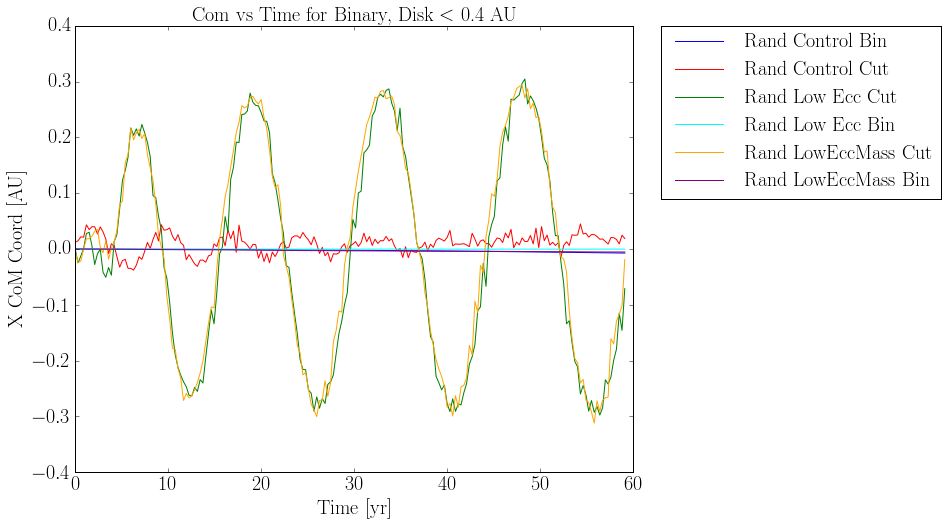

In [4]:
plt.plot(rand_control_time,rand_control_binComX,color='blue',label='Rand Control Bin')
plt.plot(rand_control_time,rand_control_cutComX,color='red',label='Rand Control Cut')
plt.plot(rand_lowEcc_time,rand_lowEcc_cutComX,color='green',label="Rand Low Ecc Cut")
plt.plot(rand_lowEcc_time,rand_lowEcc_comBinX,color='cyan',label="Rand Low Ecc Bin")
plt.plot(rand_lowEccMassive_time,rand_lowEccMassive_cutComX,color='orange',label="Rand LowEccMass Cut")
plt.plot(rand_lowEccMassive_time,rand_lowEccMassive_comBinX,color='purple',label="Rand LowEccMass Bin")

plt.xlabel("Time [yr]")
plt.ylabel('X CoM Coord [AU]')
plt.title("Com vs Time for Binary, Disk $<$ 0.4 AU")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("comXVsTime.pdf")

#Plot Binary/Disk Com_Vel vs Time

In [10]:
rand_control_binCovX = [  0.00000000e+00,  -3.44662402e-05,   9.62451372e-05,
        -3.28464153e-04,  -4.22094359e-05,  -4.17188714e-04,
        -6.52983336e-06,  -1.79466472e-04,  -3.77314907e-05,
        -2.99536526e-04,  -3.90795441e-04,  -1.53960036e-04,
        -3.21438271e-04,  -1.58502712e-04,  -1.94784447e-04,
        -2.78720065e-04,  -2.28592435e-04,  -3.15323640e-04,
        -2.02802314e-04,  -2.29128233e-04,  -1.13886484e-04,
        -2.82607277e-04,  -1.73471611e-04,  -1.66716076e-04,
        -1.28195373e-04,  -1.47432076e-04,  -2.26849478e-04,
        -4.17389083e-04,  -2.62595904e-04,  -2.25504587e-04,
        -4.00786287e-04,  -2.07281221e-04,  -1.53609445e-04,
        -2.63811313e-04,  -4.44865691e-04,  -2.18885682e-04,
        -4.00285705e-04,  -4.33725963e-04,  -5.14746143e-04,
        -3.06481377e-04,  -4.58974657e-04,  -3.10828441e-04,
        -2.75997333e-04,  -1.56269349e-04,  -4.32358362e-04,
        -3.15219187e-04,  -1.21592209e-04,  -1.81693810e-04,
        -1.62168491e-04,  -4.47769528e-04,  -4.27725770e-04,
        -6.68672660e-04,  -4.12547316e-04,  -4.17320575e-04,
        -4.66299054e-04,  -1.91393244e-04,  -4.00489851e-04,
        -1.03247520e-04,  -4.18886652e-04,  -1.43612609e-04,
        -3.39741623e-04,  -3.62532846e-04,  -3.08889767e-04,
        -4.80395795e-04,  -6.30588792e-04,  -4.77250509e-04,
        -3.81408460e-04,  -3.16079428e-04,  -4.47066096e-04,
        -4.37863786e-04,  -1.51369801e-04,  -1.71204397e-04,
        -4.57338304e-04,  -5.25120182e-04,  -6.38940853e-04,
        -5.29688402e-04,  -6.21151984e-04,  -4.90045861e-04,
        -5.97953464e-04,  -4.87569919e-04,  -5.50071897e-04,
        -5.30566974e-04,  -5.22419946e-04,  -3.61157104e-04,
        -2.55787415e-04,  -6.29863855e-04,  -3.57885728e-04,
        -6.01459484e-04,  -5.99429394e-04,  -7.15520870e-04,
        -5.85473850e-04,  -5.92080541e-04,  -3.74821905e-04,
        -4.42205570e-04,  -7.32058574e-04,  -3.40683794e-04,
        -6.47670766e-04,  -4.44862766e-04,  -6.34564751e-04,
        -4.85399051e-04,  -5.85694286e-04,  -6.31848685e-04,
        -6.16787738e-04,  -6.06439447e-04,  -4.39734666e-04,
        -4.21976472e-04,  -5.40737620e-04,  -4.33965710e-04,
        -5.35742668e-04,  -8.02311201e-04,  -6.69250247e-04,
        -7.87643694e-04,  -4.57832655e-04,  -7.13341480e-04,
        -8.30013625e-04,  -6.29386922e-04,  -6.01492262e-04,
        -6.30137601e-04,  -7.80078675e-04,  -5.59472444e-04,
        -6.68915139e-04,  -7.75253413e-04,  -6.06720205e-04,
        -7.50897059e-04,  -7.14232858e-04,  -5.47650980e-04,
        -6.08088666e-04,  -7.35417010e-04,  -5.55997162e-04,
        -4.37248063e-04,  -6.60402456e-04,  -6.29737009e-04,
        -8.30550036e-04,  -5.52749848e-04,  -7.94475992e-04,
        -7.43908631e-04,  -7.83224535e-04,  -7.50797550e-04,
        -9.04603160e-04,  -6.58669032e-04,  -6.28677160e-04,
        -7.50495048e-04,  -7.42391085e-04,  -7.20668771e-04,
        -7.69928708e-04,  -9.80033718e-04,  -8.83869723e-04,
        -1.06560634e-03,  -7.26117295e-04,  -9.33770570e-04,
        -8.22338263e-04,  -1.03034535e-03,  -8.92872781e-04,
        -9.75383671e-04,  -1.01175232e-03,  -8.31019185e-04,
        -1.02909221e-03,  -8.25796833e-04,  -8.95911417e-04,
        -8.10088028e-04,  -1.07192909e-03,  -9.65172948e-04,
        -7.70186948e-04,  -8.90334169e-04,  -1.00821826e-03,
        -1.21856367e-03,  -9.55259956e-04,  -1.13969987e-03,
        -1.00642399e-03,  -1.16703625e-03,  -6.80474601e-04,
        -8.52028107e-04,  -8.35833602e-04,  -8.75756101e-04,
        -9.08255546e-04,  -1.04250094e-03,  -1.23218590e-03,
        -9.52903615e-04,  -9.95592453e-04,  -1.03330763e-03,
        -8.53529805e-04,  -1.03239264e-03,  -9.87604431e-04,
        -1.03540333e-03,  -1.04147877e-03,  -1.05735375e-03,
        -8.41672875e-04,  -1.13662531e-03,  -1.15873405e-03,
        -1.32901828e-03,  -1.21372499e-03,  -1.06624813e-03,
        -9.22574163e-04,  -9.88983445e-04,  -9.95102577e-04,
        -8.40144110e-04,  -1.13075077e-03,  -1.07112433e-03,
        -1.07322480e-03]

rand_control_diskCovX = [ -1.5126256 ,  -1.65167331,  -4.00779158,  -5.04496851,
        -8.0354289 ,  -7.25484052,  -9.79234056,  -8.32228316,
       -10.29962872, -11.28193999,  -8.74678263,  -9.43325965,
        -6.82331308,  -7.90247617,  -5.69244233,  -3.18337335,
        -2.8900313 ,  -2.44443717,  -0.49515905,   1.74531975,
         1.03799587,   3.25726571,   1.56107433,   1.02126618,
         0.69393905,   0.86918266,  -1.93566243,  -1.39075816,
        -3.79511877,  -5.2513283 ,  -4.67550437,  -8.95841897,
        -7.84857164,  -9.06952394,  -8.97909541,  -9.29789789,
        -8.3497143 ,  -7.74469596,  -8.17316258,  -4.63791668,
        -4.75224184,  -3.10335463,  -2.6018622 ,   0.36220533,
        -0.53086794,  -0.30306845,   0.2209037 ,   0.80351038,
        -0.90484794,   0.37355293,  -2.32510622,  -2.30904879,
        -3.06573551,  -4.73845648,  -3.00088813,  -5.20346885,
        -4.86749413,  -7.33028667,  -4.52658142,  -9.64543304,
        -5.88985328,  -4.79459671,  -6.47577831,  -4.05308612,
        -5.44454985,  -4.47537662,  -1.69328104,  -3.43343426,
        -1.44316016,  -1.32784493,  -1.23193473,  -1.30243875,
        -0.38619502,  -0.29059253,  -2.19551559,  -2.34997492,
        -1.62956831,  -2.88566741,  -4.31676219,  -5.61977362,
        -6.67430956,  -6.7898244 ,  -8.08788717,  -6.50543483,
        -7.1735637 ,  -6.4562886 ,  -7.00111061,  -4.93631704,
        -3.92457256,  -4.02315485,  -2.37083858,  -1.60522769,
        -0.54306117,  -1.17757655,  -1.2918314 ,  -1.77202876,
        -1.03103411,  -3.07460906,  -1.10957091,  -2.97700063,
        -2.68480148,  -3.72043253,  -3.39556717,  -5.57421232,
        -5.24106186,  -5.73959351,  -4.60606218,  -5.33647792,
        -5.42667641,  -4.26795998,  -6.01263563,  -5.66170869,
        -7.2788476 ,  -5.9235328 ,  -6.15081406,  -5.52803381,
        -4.69335924,  -4.2670216 ,  -2.40604717,  -3.74200719,
        -2.1271753 ,  -2.17052372,  -2.35009723,  -2.10470604,
        -1.39241017,  -2.83219843,  -2.28429318,  -2.19918767,
        -1.51924294,  -3.11922652,  -3.44235654,  -5.32144922,
        -4.11181106,  -5.50103192,  -6.67581384,  -5.44160528,
        -3.21380046,  -4.38708606,  -4.66410755,  -4.98185644,
        -4.03089134,  -3.59967485,  -4.08866682,  -5.40969569,
        -4.78645659,  -3.56334996,  -4.39103124,  -3.89461665,
        -3.91874112,  -3.96974105,  -3.72064514,  -3.99302409,
        -4.16286445,  -4.42467072,  -4.69350698,  -6.29595816,
        -4.1547458 ,  -6.48633821,  -3.56127029,  -4.41146317,
        -4.39013052,  -4.68041565,  -4.86606127,  -5.44333464,
        -5.25268531,  -4.07465792,  -6.83275246,  -4.48811929,
        -8.10824661,  -3.62448687,  -6.49627804,  -3.33448353,
        -5.07028484,  -3.17845176,  -2.26118164,  -1.39727202,
        -1.80522507,  -3.57740069,  -3.16799806,  -4.76228035,
        -6.38844709,  -4.69763866,  -6.612915  ,  -4.71243205,
        -6.27378816,  -5.01240057,  -7.21131357,  -5.43375619,
        -6.09954938,  -5.4777062 ,  -4.69170273,  -4.01259332,
        -4.25706036,  -4.27559808,  -5.41513147,  -3.9322204 ,
        -4.03988551,  -5.5681088 ,  -4.15420189]

rand_lowEcc_diskCovX = [  0.77898797,   1.57833866,   2.38863217,   3.40701148,
         2.48352759,   4.36322833,   8.57983618,  11.11732867,
         8.13365034,   9.4756637 ,  18.38497572,  16.97897149,
        21.31103577,  21.22253813,  17.39017903,  14.0628516 ,
        10.12295822,   1.94075525,  -1.07775588,  -9.30955363,
       -17.23845933, -21.37340468, -21.71260131, -30.27500394,
       -35.50196759, -36.41238004, -37.62509692, -38.08500723,
       -35.88332165, -35.50672278, -33.33106392, -30.85999458,
       -22.66648974, -21.93878725, -12.91471643,  -7.05439705,
         2.31718962,   6.21311488,  10.73867876,  17.96918075,
        19.20569263,  28.30079839,  30.8831651 ,  33.5354604 ,
        38.03217296,  40.43434213,  41.64392787,  42.15158522,
        40.84057607,  39.05393268,  40.03316223,  36.24276594,
        29.59492791,  28.47291982,  22.9794586 ,  24.13108538,
        12.20828893,   7.45982279,   1.50355105,  -2.30613005,
       -12.20141423, -16.40766442, -21.22114568, -27.41957954,
       -28.84923137, -31.31003167, -37.40647979, -40.4959681 ,
       -41.95281726, -42.7981446 , -42.56091383, -41.46580417,
       -40.76993254, -38.38212678, -35.37956372, -32.20474293,
       -27.11290213, -26.24868669, -18.024329  , -14.62735563,
        -6.45090835,  -2.04945776,   4.18011961,   7.6196234 ,
        14.48677844,  18.08660124,  24.96174356,  30.31698632,
        35.55709176,  40.32201023,  39.15481735,  41.21744306,
        44.85353782,  42.04793646,  45.00366348,  42.51266827,
        41.72615711,  38.92801538,  37.44887222,  32.17050213,
        24.48484257,  25.02725828,  16.24246455,  16.18161924,
         6.33807262,   2.03869272,  -0.6570159 ,  -9.9160961 ,
       -12.57730826, -22.93593491, -25.21130883, -32.75696005,
       -31.92793658, -34.59386864, -40.30345398, -41.37916997,
       -41.81226885, -44.77427734, -42.45896069, -42.92549817,
       -40.05130083, -40.4003472 , -35.85871249, -32.82294389,
       -29.04893104, -27.22059023, -23.35880779, -14.90757144,
        -7.77531276,  -4.17832706,   3.47438538,   9.4963396 ,
        12.39946865,  14.73777289,  22.54199223,  27.66521168,
        32.8445241 ,  37.36743206,  37.3521086 ,  40.21008503,
        41.21920734,  43.46178485,  44.20773532,  43.65711613,
        44.79675309,  39.76273156,  39.65398226,  32.59524381,
        36.70642274,  29.10109591,  24.56519464,  22.88643289,
        14.26685193,  12.37901575,   1.96513927,  -1.67945581,
        -3.36070802, -16.19644279, -16.51751263, -23.20482377,
       -25.02884003, -32.55437688, -35.21901456, -38.74079143,
       -40.88142771, -42.01386169, -44.42113075, -46.00458279,
       -45.15618165, -44.6585503 , -43.02429994, -42.08290425,
       -38.6199642 , -33.19797918, -31.7537908 , -27.49925803,
       -23.66452656, -13.6948019 , -12.91483604,  -5.76925396,
        -1.31826054,   3.01890583,  11.37350305,  12.18349423,
        19.71945794,  23.66122164,  28.29464667,  33.96283017,
        36.32521476,  38.23232969,  40.43232437,  42.60912096,
        43.59694651,  46.66450731,  45.3996852 ,  44.14779248,
        40.45245177,  43.60926838,  38.7946921 ]

rand_lowEcc_binCovX = [  0.00000000e+00,  -5.34923846e-05,  -6.64845564e-05,
        -4.33460968e-04,  -1.64193255e-04,  -1.81730410e-04,
        -3.40928004e-04,  -6.85394607e-04,   1.44548929e-05,
         4.14449499e-04,  -1.16253574e-04,   4.79198193e-04,
         2.23820787e-05,   7.00056332e-05,   8.05942242e-05,
         1.78516008e-04,  -2.08011302e-04,  -2.83853794e-04,
        -3.99268355e-04,  -2.16383050e-04,  -1.72754962e-04,
        -2.59498691e-04,  -5.54155249e-04,  -3.93072504e-05,
        -1.41112006e-04,  -3.80210846e-04,  -2.81833325e-04,
         2.58091168e-05,  -7.23899905e-05,  -4.36764387e-04,
        -2.03032592e-04,  -1.76150724e-04,  -5.82563660e-05,
        -2.54213860e-04,  -4.78098107e-05,   5.83330344e-05,
        -2.36500599e-04,  -2.29224066e-04,   2.48177156e-05,
         1.02031632e-04,   2.28121231e-04,   1.64083560e-04,
         7.76420378e-05,   2.14331702e-04,   2.82511085e-04,
         1.32028557e-04,   2.90219932e-04,   9.29529157e-05,
         1.22581252e-04,   1.21643193e-04,   7.23196512e-05,
        -2.25215148e-05,   1.71447477e-04,   1.99716983e-06,
         8.19852519e-05,  -1.90109171e-04,  -1.38166388e-04,
         1.30522240e-04,  -2.07466670e-04,  -4.17296034e-04,
        -8.03657045e-05,  -1.57644711e-04,  -2.37040743e-04,
        -2.26641592e-04,  -4.45961754e-04,  -4.66227968e-04,
        -1.08581367e-04,  -5.32177154e-05,  -2.13471462e-04,
        -5.03141438e-04,   6.12146284e-05,   2.16641039e-04,
        -1.67410213e-04,  -5.18369480e-04,  -2.97862035e-04,
        -8.68209078e-05,  -4.18619727e-04,  -1.43059752e-04,
        -2.33447354e-05,   9.34982318e-05,   8.52592361e-05,
        -4.41609127e-05,   2.31979955e-04,   3.50471814e-04,
         3.04385046e-04,   3.92463428e-04,  -2.55918791e-06,
         7.95096228e-05,   1.91780255e-04,   2.68430146e-04,
         4.45320904e-04,   2.91298357e-04,   3.23627602e-04,
         1.99272218e-04,  -9.21845279e-05,   2.04818759e-04,
         4.14741846e-04,   1.50873389e-04,  -1.49996197e-04,
         2.77680254e-04,   2.06220986e-04,  -1.35716403e-04,
         7.95365340e-06,  -1.88426744e-04,   6.09211568e-05,
        -1.40779439e-04,  -1.56321143e-04,  -1.37570125e-04,
         1.31841951e-05,   3.31192472e-06,  -1.32128460e-04,
        -1.06097909e-04,  -2.80318816e-04,  -2.04469168e-04,
        -1.26462231e-04,  -2.66803263e-04,  -4.87774613e-04,
        -4.47451020e-04,  -2.20706347e-04,  -2.28705598e-04,
        -2.45148325e-04,  -8.47289713e-05,  -2.83985861e-04,
        -2.76947406e-04,  -1.25098372e-04,   2.22215515e-05,
         6.07563916e-05,   6.72276302e-05,  -2.00065376e-04,
        -7.49768806e-06,  -1.64401893e-04,  -3.28377541e-04,
         2.15527702e-05,   4.37081623e-04,   1.08117116e-04,
         1.42211143e-04,  -1.27683226e-04,   1.70996029e-04,
         3.66508096e-04,   1.08112373e-04,   2.36921908e-04,
         2.37938241e-04,   1.01392835e-04,   2.75508171e-04,
         3.48262575e-04,   3.66599510e-04,   1.57544550e-04,
         1.68373451e-04,  -4.12027831e-05,  -1.78907481e-05,
         6.92867023e-05,  -1.55375413e-05,  -4.71555830e-05,
         1.05083519e-05,   8.29191882e-06,   8.89450308e-05,
        -1.90216896e-04,   3.66172911e-06,  -8.21931479e-05,
        -1.31558945e-04,  -2.77210844e-04,   3.04982678e-05,
         3.59246883e-05,   2.94710484e-04,   3.83594289e-05,
        -3.12614463e-04,  -2.39987400e-04,   2.93023612e-05,
        -7.60489508e-05,  -9.60984229e-05,  -2.44843211e-04,
        -2.53002020e-04,  -1.50779900e-04,  -8.53930636e-05,
         9.07427402e-05,   3.90741689e-05,  -1.96535202e-04,
        -3.17662118e-04,  -1.01405697e-04,  -1.80767578e-04,
        -8.25531212e-05,   2.10176574e-04,   2.26438321e-04,
         2.75334263e-04,   7.06060122e-05,  -6.04716733e-05,
        -8.56491616e-06,  -1.23788719e-04,   3.05034811e-04,
         6.58372649e-04,   5.63655885e-04,   1.23729296e-04,
         3.11940568e-04,   2.92992329e-04,   1.27585189e-04,
         9.40623415e-05,   4.36472518e-05,  -1.17963437e-04,
         1.90672601e-04]

rand_lowEccMassive_binCovX = [  0.00000000e+00,  -1.07914431e-03,  -1.33716935e-03,
        -4.26616047e-04,  -6.85164044e-04,  -7.35099654e-04,
        -4.12263939e-04,  -4.49734934e-04,  -6.77038840e-04,
        -3.78722084e-04,  -5.55766446e-04,  -4.66884247e-05,
        -1.05919215e-03,  -1.76028477e-04,  -3.17696097e-04,
        -6.11404675e-04,   1.46225058e-05,  -1.06624220e-03,
         1.81188420e-04,  -7.64163625e-04,  -2.11388387e-04,
        -1.01884498e-03,  -1.34523211e-03,  -1.05192086e-03,
        -1.04247947e-03,  -5.66269240e-04,  -1.14755495e-03,
        -1.07330079e-03,  -7.44383740e-04,  -7.76936364e-04,
        -7.15430496e-04,  -3.14470940e-04,  -2.24181640e-04,
        -4.86255175e-04,  -7.20721113e-04,  -1.44905876e-03,
        -6.49329490e-04,   5.43983050e-04,  -4.14593877e-04,
        -2.11724087e-04,   3.62901558e-04,  -3.46380622e-04,
        -5.42971128e-04,  -5.86819351e-04,  -1.37184977e-04,
        -1.68939894e-04,  -3.57139902e-04,   3.14763679e-06,
        -3.64074064e-05,   5.14759217e-04,  -3.23440620e-04,
        -2.91715004e-04,  -8.46374137e-04,  -3.26971486e-04,
        -2.21124194e-04,  -3.51654005e-04,  -8.71430455e-04,
        -1.43490114e-04,  -5.61756810e-04,  -9.04529133e-04,
        -6.77418983e-04,  -7.33993078e-04,  -8.28526236e-04,
        -1.35318089e-03,  -9.48738361e-04,  -1.30478444e-03,
        -1.37056266e-03,  -1.18091805e-03,  -6.15796379e-04,
        -7.55169770e-04,  -7.70514629e-04,  -1.04966699e-03,
        -1.38418843e-03,  -9.78222583e-04,  -3.25711221e-04,
        -6.59798010e-04,  -1.08079782e-03,  -9.30981318e-04,
        -8.17865127e-04,  -3.08442002e-04,  -6.84864486e-04,
        -7.29227944e-04,  -3.06196249e-04,   2.54947228e-04,
         2.53757867e-04,   1.60418873e-05,  -3.53442675e-04,
        -6.19012167e-04,  -5.78733142e-04,  -8.28520682e-05,
         2.84674982e-04,   4.55511299e-04,  -4.01814836e-04,
        -2.99176371e-04,   1.32204927e-04,   4.00363088e-04,
         7.99161316e-05,  -1.99368303e-04,  -3.11023426e-04,
        -9.02509313e-05,  -1.00283504e-04,  -2.85974426e-04,
        -2.85076458e-04,  -8.78510800e-04,  -5.36717277e-04,
        -2.61400122e-05,  -3.83282066e-04,  -2.07753123e-04,
        -6.88419122e-04,  -1.19267722e-03,  -2.09304811e-04,
        -2.19286610e-04,  -1.06597189e-03,  -9.77511096e-04,
        -9.65993963e-04,  -9.17091419e-04,  -6.17415531e-04,
        -8.03560463e-04,  -1.01075689e-03,  -1.06083225e-03,
        -6.66109954e-04,  -2.00903513e-04,  -6.43056483e-04,
        -9.69208356e-04,  -8.46023495e-04,  -2.37851716e-04,
        -4.57334971e-04,  -7.34531127e-04,  -1.03887850e-03,
        -4.77006083e-04,  -2.50417279e-04,   2.23551834e-04,
         4.43063921e-04,   2.64509669e-04,   1.56083551e-04,
         8.73652713e-05,  -2.31216532e-05,  -2.20183989e-04,
         2.80480713e-04,   3.86311963e-04,  -3.39483447e-06,
         1.51430515e-04,  -9.55058668e-05,   4.57666279e-05,
         9.79560027e-05,   4.28597950e-05,   1.70385563e-04,
        -1.32150028e-04,  -1.56960181e-04,  -3.04830167e-04,
        -6.35423942e-04,  -8.54995257e-04,  -5.60839743e-04,
        -1.24103109e-04,  -2.29108976e-04,  -8.01022068e-04,
        -8.36520457e-04,  -4.14501259e-04,  -4.17252811e-04,
        -6.12252250e-04,  -1.14732944e-03,  -1.07464432e-03,
        -9.87909599e-04,  -4.84165684e-04,  -2.35732602e-04,
        -2.54528001e-04,  -1.01133984e-03,  -5.78352269e-04,
        -8.64199234e-04,  -8.04990815e-04,  -2.95045615e-04,
        -4.82240473e-04,  -6.60363838e-04,  -1.23747132e-03,
        -1.61377876e-03,  -8.94687543e-04,  -5.15841577e-04,
         3.03234294e-04,  -3.94018867e-04,  -5.58887092e-04,
        -8.53146407e-04,  -5.59255104e-04,  -4.77543700e-04,
         6.81500700e-05,  -5.79423865e-04,  -2.95269005e-04,
        -3.42276370e-04,  -5.62704260e-04,   1.55784112e-04,
        -1.14777274e-04,   7.52370049e-05,  -1.61721047e-04,
        -8.14079452e-04,  -6.88855836e-04,  -1.21330178e-04,
         5.76051554e-05,  -4.30815303e-05,  -1.17046529e-04,
         9.75071908e-05]

rand_lowEccMassive_diskCovX = [ -1.42771848,   1.43690773,   2.91232488,   2.12071   ,
        -0.71235185,   1.27686965,   2.82137903,   3.35673936,
         5.41479141,   8.97204311,  10.41533525,  10.2414196 ,
        15.96194939,  14.37488193,  14.39175711,  12.93983194,
         5.99441222,   4.06201017,  -7.43421404, -10.61675775,
       -18.36582894, -21.70028597, -26.88450182, -32.85656411,
       -36.96696731, -38.67032425, -36.67945839, -39.16406487,
       -37.9210528 , -33.97474774, -29.8804133 , -27.89659391,
       -23.26657849, -16.88948439, -10.76013879,  -1.03637469,
         1.29576628,   9.04421282,  12.381707  ,  21.70296502,
        21.77061049,  33.36496674,  34.08790689,  38.59116171,
        39.76865721,  40.66262914,  42.52923578,  43.10792047,
        41.34427514,  37.59697272,  38.75520375,  33.72988381,
        27.5380652 ,  23.71145563,  17.72943245,  14.65148948,
         9.76835216,   2.01081731,  -4.2468484 ,  -8.15953049,
       -15.21222501, -19.44396646, -23.62040184, -29.89737523,
       -33.31311744, -34.12074933, -39.42058388, -41.51586217,
       -42.60283009, -43.61677863, -41.20454903, -41.33102694,
       -39.13245487, -40.2586909 , -37.32509445, -28.63831661,
       -27.793696  , -22.28332464, -18.51683942, -11.63794631,
        -4.97640202,  -0.98524744,   4.97781883,   7.30023668,
        15.80033142,  22.61212003,  26.73634895,  32.22368874,
        35.01908933,  38.35380993,  40.6659621 ,  42.45294022,
        44.04195424,  42.27704902,  41.95339788,  40.17772166,
        40.86666481,  33.27684951,  29.50159726,  28.43735614,
        21.94841141,  17.80371533,  10.96036926,   7.0763799 ,
         0.97580493,  -4.24177404,  -8.38834838, -14.94740138,
       -20.40690762, -23.68916268, -26.43303764, -32.49441889,
       -36.13637485, -37.96846127, -37.49737772, -42.41407578,
       -43.32839626, -44.59202004, -43.79034786, -41.9908508 ,
       -43.25646201, -39.51498703, -36.80441147, -31.73715587,
       -30.39090239, -26.47027476, -19.7083165 , -16.23123587,
        -8.18375635,  -4.40904087,   1.22151365,   5.6628281 ,
        11.2797065 ,  15.34365641,  22.20912641,  27.51899128,
        33.40193056,  38.62734712,  39.57977773,  40.17226738,
        43.26297741,  44.7668022 ,  44.86849434,  43.83316643,
        40.14229577,  40.39637215,  33.43243243,  35.15334845,
        30.08591749,  24.38441818,  19.59029332,  17.82393841,
        10.77311327,   4.31900444,  -2.03044693,  -3.7585325 ,
        -9.47741097, -15.8487628 , -18.61071513, -26.43823069,
       -28.46973278, -32.68615562, -35.21794316, -38.85488475,
       -40.46279057, -44.06462956, -43.73806014, -45.34955494,
       -45.53322126, -44.0652855 , -44.36681314, -41.71765492,
       -38.51593144, -37.00769863, -30.87323575, -28.48842655,
       -25.95462946, -24.25324065, -16.06641798,  -8.24873957,
        -1.96200351,   1.47995866,   7.49416438,   9.12719164,
        19.23186922,  23.73391692,  27.00163924,  33.78940963,
        35.66204183,  39.32976715,  41.21933532,  44.38235022,
        45.69548758,  42.59122408,  44.3949277 ,  42.05189024,
        42.4218718 ,  41.56324192,  34.76155522]

rand_short_diskCovX = [  7.78987971e-01,   1.89638644e-02,   8.09874777e-01,
        -1.25876920e+00,   1.53401984e+00,  -1.03216237e+00,
         7.09684065e-01,  -1.25100083e+00,   2.74235993e+00,
        -3.33351935e+00,   3.71010619e+00,  -2.53152672e+00,
         3.82080799e+00,  -2.02306324e+00,   4.33283744e+00,
        -1.74336127e+00,   4.72967714e+00,  -1.81513950e+00,
         6.34231055e+00,  -2.60646729e+00,   6.37956619e+00,
        -7.41732018e-01,   6.26033267e+00,   1.03177708e-01,
         7.49477547e+00,   4.90685024e-01,   9.75294972e+00,
        -2.53247020e-01,   1.09543173e+01,   2.37756107e-01,
         1.19524308e+01,   1.23513966e+00,   1.27521416e+01,
         4.40773896e+00,   1.12736164e+01,   1.19743120e+01,
         6.84758054e+00,   1.54134410e+01,   7.49895139e+00,
         1.79484722e+01,   1.35178759e+01,   1.11032950e+01,
         1.90210715e+01,   1.11440270e+01,   1.80007332e+01,
         1.50867205e+01,   1.39506571e+01,   1.66426184e+01,
         1.08103874e+01,   1.84549134e+01,   1.28823910e+01,
         1.39793766e+01,   1.53448367e+01,   9.85196546e+00,
         1.38316756e+01,   1.05423788e+01,   8.59791248e+00,
         1.09803181e+01,   5.50787804e+00,   6.17095303e+00,
         8.51727418e+00,   2.26324523e+00,   5.29504246e+00,
        -7.22797281e-01,   5.42057147e-01,   2.70605992e-01,
        -6.83669845e+00,  -4.72463802e+00,  -4.82931431e+00,
        -8.38702704e+00,  -1.03401755e+01,  -1.11932186e+01,
        -9.57522921e+00,  -1.47363328e+01,  -1.64006683e+01,
        -1.42617572e+01,  -1.91161100e+01,  -1.99387830e+01,
        -2.03054707e+01,  -2.30334182e+01,  -2.36654979e+01,
        -2.43300101e+01,  -2.77498908e+01,  -2.88984704e+01,
        -2.74579383e+01,  -3.09234585e+01,  -3.24328116e+01,
        -3.21424880e+01,  -3.46031495e+01,  -3.56856043e+01,
        -3.39032552e+01,  -3.69322255e+01,  -3.60365340e+01,
        -3.46046698e+01,  -3.63833476e+01,  -3.84395904e+01,
        -3.84317135e+01,  -3.84234970e+01,  -3.84405800e+01,
        -3.75915618e+01,  -3.69440386e+01,  -3.58158869e+01,
        -3.72838335e+01,  -3.87853220e+01,  -3.66459631e+01,
        -4.00786687e+01,  -3.63372077e+01,  -3.50606824e+01,
        -3.57573977e+01,  -3.54168244e+01,  -3.22360725e+01,
        -3.33510529e+01,  -3.50436772e+01,  -3.12839925e+01,
        -3.31668928e+01,  -3.15853506e+01,  -2.98567391e+01,
        -2.81493630e+01,  -2.63612041e+01,  -2.45173041e+01,
        -2.30610365e+01,  -2.47720468e+01,  -2.36005319e+01,
        -2.28379356e+01,  -1.98085183e+01,  -2.03002466e+01,
        -1.45145889e+01,  -1.55369135e+01,  -1.27200981e+01,
        -1.17241233e+01,  -1.22662505e+01,  -8.08863577e+00,
        -1.14663549e+01,  -7.14810017e+00,  -4.25724415e+00,
        -5.49822402e+00,  -3.75040409e-01,   2.01729881e+00,
         4.41071429e-01,   3.19822174e+00,   3.53528108e+00,
         3.09011384e+00,   5.36461046e+00,   6.50476274e+00,
         1.10963707e+01,   1.14606908e+01,   1.25913713e+01,
         1.42781790e+01,   1.64674843e+01,   1.68045461e+01,
         1.84557469e+01,   1.99627852e+01,   2.23577183e+01,
         2.20838676e+01,   2.42760823e+01,   2.45387823e+01,
         2.45544971e+01,   3.02933226e+01,   2.69789920e+01,
         2.79892983e+01,   3.22020227e+01,   3.19982858e+01,
         3.27492034e+01,   3.33687079e+01,   3.54444525e+01,
         3.38905834e+01,   3.63817723e+01,   3.60202656e+01,
         3.85307800e+01,   3.77801508e+01,   3.70980429e+01,
         4.18230967e+01,   3.88800980e+01,   3.96581438e+01,
         4.12310084e+01,   4.10010044e+01,   4.09998623e+01,
         4.12584668e+01,   4.05159907e+01,   4.00698367e+01,
         4.26890927e+01,   4.25783827e+01,   4.26254685e+01,
         4.21795970e+01,   4.41036182e+01,   4.12809930e+01,
         4.28791987e+01,   4.20586487e+01,   4.18281945e+01,
         4.14415090e+01,   4.10173113e+01,   4.15662894e+01,
         3.97533096e+01,   4.11265642e+01,   3.70085621e+01,
         3.83003391e+01,   3.78183061e+01,   3.24067624e+01,
         3.72986305e+01,   3.36503146e+01,   3.27996407e+01,
         3.14880384e+01,   3.42625261e+01,   3.18873418e+01,
         2.75256557e+01,   2.62640499e+01]

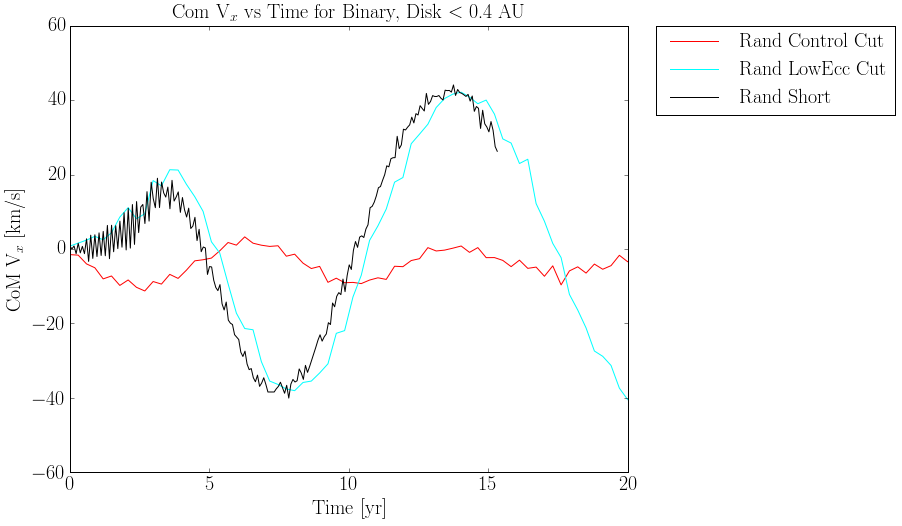

In [14]:
#plt.plot(rand_control_time,rand_control_binCovX,color='blue',label='Rand Control Bin')
plt.plot(rand_control_time,rand_control_diskCovX,color='red',label='Rand Control Cut')
#plt.plot(rand_lowEcc_time,rand_lowEcc_binCovX,color='green',label='Rand LowEcc Bin')
plt.plot(rand_lowEcc_time,rand_lowEcc_diskCovX,color='cyan',label='Rand LowEcc Cut')
#plt.plot(rand_lowEccMassive_time,rand_lowEccMassive_binCovX,color='orange',label='Rand LowEccMass Bin')
#plt.plot(rand_lowEccMassive_time,rand_lowEccMassive_diskCovX,color='purple',label='Rand LowEccMass Cut')
plt.plot(rand_short_time,rand_short_diskCovX,color='black',label="Rand Short")

plt.xlabel("Time [yr]")
plt.ylabel('CoM V$_{x}$ [km/s]')
plt.xlim(0,20)
plt.title("Com V$_{x}$ vs Time for Binary, Disk $<$ 0.4 AU")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("comVelVsTime.pdf")

#Plot disk averaged eccentricity vs Time

In [7]:
rand_control_EccAvg = [ 0.00487201,  0.04180032,  0.03851285,  0.03752069,  0.03780721,
        0.03956908,  0.04223939,  0.04201101,  0.04269907,  0.04346587,
        0.04481644,  0.04536227,  0.04443861,  0.04353817,  0.04369682,
        0.04470908,  0.04355081,  0.04240949,  0.04107202,  0.03974267,
        0.04012787,  0.03843651,  0.03686991,  0.03591092,  0.035957  ,
        0.03666101,  0.03643748,  0.03553824,  0.03578638,  0.03814097,
        0.03921233,  0.03988067,  0.04049772,  0.04217771,  0.04429624,
        0.04397485,  0.04379825,  0.0436872 ,  0.04504912,  0.0448944 ,
        0.04399126,  0.04317838,  0.04337346,  0.04307827,  0.04198505,
        0.04039283,  0.03891559,  0.0390871 ,  0.03950234,  0.03857206,
        0.03791866,  0.03760023,  0.03928343,  0.03972615,  0.03885249,
        0.03866659,  0.04026426,  0.04168991,  0.04205447,  0.04153104,
        0.04233504,  0.04278785,  0.04320669,  0.04258799,  0.04191725,
        0.04249705,  0.04270488,  0.04226141,  0.04136872,  0.04051884,
        0.04081458,  0.04074077,  0.03915969,  0.03825639,  0.03825456,
        0.03950996,  0.0393274 ,  0.03878758,  0.0390752 ,  0.04096421,
        0.04170068,  0.04114054,  0.04150873,  0.04246561,  0.04343714,
        0.04306775,  0.0424147 ,  0.04285842,  0.0431017 ,  0.04279854,
        0.0417474 ,  0.04069654,  0.04075689,  0.04120416,  0.04000833,
        0.03931684,  0.0391979 ,  0.03983416,  0.03950426,  0.03916882,
        0.03849648,  0.03971262,  0.04009718,  0.03963512,  0.03908021,
        0.04000813,  0.04112507,  0.04093958,  0.04035521,  0.04081016,
        0.04158027,  0.04256347,  0.04179268,  0.04185037,  0.04328444,
        0.04332157,  0.04305916,  0.04194896,  0.04263865,  0.04244831,
        0.04204137,  0.04059532,  0.0400513 ,  0.04045862,  0.040432  ,
        0.0393538 ,  0.03855592,  0.03933001,  0.04002192,  0.0391092 ,
        0.03849106,  0.03957885,  0.04029119,  0.04021804,  0.03972438,
        0.04020537,  0.04107444,  0.04121746,  0.04007836,  0.03983128,
        0.04049721,  0.04037862,  0.03981167,  0.03915504,  0.04001195,
        0.04090319,  0.04007406,  0.03927385,  0.03948236,  0.04038467,
        0.03961908,  0.03895531,  0.03910493,  0.04029266,  0.04039683,
        0.03956583,  0.03900967,  0.0402679 ,  0.04033355,  0.03977701,
        0.03936939,  0.04004704,  0.04111372,  0.04020798,  0.03980901,
        0.0403087 ,  0.04134421,  0.04076755,  0.04022486,  0.04014529,
        0.04147857,  0.04126809,  0.04042575,  0.03972712,  0.04066002,
        0.04039926,  0.03906719,  0.0381269 ,  0.03894483,  0.03913009,
        0.03905672,  0.03823394,  0.03939917,  0.0401762 ,  0.04006709,
        0.03936568,  0.04030915,  0.04070843,  0.0406252 ,  0.03996044,
        0.03995623,  0.04067097,  0.04043389,  0.03957182,  0.03945732,
        0.04007075,  0.04014291,  0.03936366,  0.03870979]

rand_lowEcc_EccAvg = [ 0.00500734,  0.03249216,  0.0324958 ,  0.03347418,  0.03397438,
        0.03602948,  0.04041205,  0.04513343,  0.04971377,  0.05294594,
        0.05750857,  0.06076513,  0.06514267,  0.06813331,  0.07115473,
        0.074007  ,  0.07756696,  0.07947312,  0.08246412,  0.0840094 ,
        0.08677427,  0.08773907,  0.08886279,  0.09025826,  0.09189344,
        0.09272375,  0.09395771,  0.09460556,  0.09510229,  0.09579088,
        0.09626372,  0.09723888,  0.09799683,  0.09855137,  0.09846784,
        0.09910923,  0.09957972,  0.09950406,  0.09957766,  0.10077185,
        0.10130065,  0.10128989,  0.10087359,  0.10056851,  0.10161155,
        0.10215376,  0.10182201,  0.10162289,  0.10236954,  0.10232074,
        0.10284893,  0.10331323,  0.10463164,  0.10431289,  0.10469804,
        0.10512315,  0.10526233,  0.10565402,  0.10582524,  0.10628243,
        0.10644306,  0.10668714,  0.10720244,  0.10756658,  0.1078622 ,
        0.10787792,  0.10861674,  0.10898486,  0.10862385,  0.10911845,
        0.10960801,  0.11033102,  0.11009527,  0.11007839,  0.11100564,
        0.11130082,  0.11176758,  0.11247991,  0.11222803,  0.11255093,
        0.11338593,  0.11335151,  0.113533  ,  0.11372692,  0.11412401,
        0.1147058 ,  0.11475829,  0.11485172,  0.11571516,  0.11589287,
        0.1155855 ,  0.1161617 ,  0.11603841,  0.11615223,  0.11694014,
        0.11663835,  0.11579418,  0.11593714,  0.11665504,  0.11621879,
        0.11593484,  0.11648813,  0.11628673,  0.11653722,  0.11638078,
        0.11595897,  0.11636726,  0.11625445,  0.11624765,  0.11619117,
        0.11616727,  0.11645269,  0.11593247,  0.11580054,  0.11636329,
        0.11697719,  0.11659711,  0.11636697,  0.11714402,  0.11707672,
        0.11735839,  0.11759648,  0.11755906,  0.11776528,  0.11780128,
        0.11795161,  0.11834771,  0.11886222,  0.11893544,  0.11882141,
        0.11987957,  0.1197417 ,  0.11962029,  0.12000008,  0.11982921,
        0.12008821,  0.1201905 ,  0.12042185,  0.12043252,  0.12031116,
        0.11999559,  0.1203899 ,  0.12105716,  0.12093766,  0.12096428,
        0.12119392,  0.12136223,  0.12179417,  0.12183363,  0.12219711,
        0.12201712,  0.12286412,  0.12285458,  0.12352229,  0.12261333,
        0.12247145,  0.12251773,  0.12317143,  0.12336107,  0.12293545,
        0.12290551,  0.12442698,  0.12439054,  0.12401112,  0.12424855,
        0.12497671,  0.12544967,  0.12587754,  0.12542407,  0.12571893,
        0.12539773,  0.12504962,  0.1253236 ,  0.12544627,  0.12547084,
        0.12618286,  0.12595276,  0.12581871,  0.126423  ,  0.1266554 ,
        0.12674926,  0.12723005,  0.12719745,  0.12742923,  0.12821989,
        0.12743035,  0.12799925,  0.12841639,  0.12810177,  0.12837832,
        0.12859332,  0.12874983,  0.12839356,  0.12837171,  0.1285162 ,
        0.1279544 ,  0.12914065,  0.1288253 ,  0.12925462]

rand_lowEccMassive_EccAvg = [ 0.00489688,  0.03215555,  0.03180738,  0.03189375,  0.03239275,
        0.03327238,  0.03494235,  0.03800543,  0.04158346,  0.04558192,
        0.04945648,  0.05406943,  0.05894967,  0.06218426,  0.06526745,
        0.06985636,  0.07216788,  0.07561177,  0.0782771 ,  0.08049138,
        0.08309391,  0.08479126,  0.08648114,  0.08860226,  0.08995567,
        0.09145491,  0.0926818 ,  0.09408184,  0.09559389,  0.09638268,
        0.09711639,  0.0980874 ,  0.09857883,  0.09956618,  0.10012386,
        0.10042123,  0.10082116,  0.10198468,  0.10234039,  0.10246897,
        0.10297293,  0.1038709 ,  0.1040406 ,  0.10415051,  0.10415309,
        0.10401941,  0.10428724,  0.10467144,  0.10517072,  0.10552113,
        0.106039  ,  0.10665369,  0.10695797,  0.10686706,  0.10722779,
        0.10779008,  0.10782983,  0.10842116,  0.10868828,  0.1092956 ,
        0.10932093,  0.1085315 ,  0.10874692,  0.10897597,  0.11004881,
        0.10964979,  0.10948879,  0.10978661,  0.10980574,  0.10995103,
        0.10966869,  0.11067106,  0.11044233,  0.11021766,  0.11052096,
        0.11068617,  0.11033505,  0.11040883,  0.11093955,  0.11106698,
        0.11147305,  0.11193535,  0.11187031,  0.11186748,  0.11223046,
        0.1116318 ,  0.1125589 ,  0.11291622,  0.11332185,  0.11288532,
        0.11368939,  0.11444464,  0.11441549,  0.11392974,  0.1139659 ,
        0.11369491,  0.1143343 ,  0.11434597,  0.11488153,  0.11492534,
        0.11540733,  0.11558369,  0.11574626,  0.11585824,  0.11609538,
        0.11667898,  0.1165603 ,  0.1170316 ,  0.11714255,  0.11728343,
        0.11790111,  0.11787874,  0.11799447,  0.1180892 ,  0.11785242,
        0.11864723,  0.11908111,  0.11895852,  0.1192297 ,  0.11921536,
        0.11947406,  0.11958166,  0.1197272 ,  0.11999862,  0.12039769,
        0.12029136,  0.1203157 ,  0.12036302,  0.12045131,  0.12085195,
        0.12053696,  0.12136503,  0.12187175,  0.12218088,  0.12179722,
        0.12185905,  0.12273182,  0.12264414,  0.12229096,  0.12290741,
        0.12275362,  0.12256102,  0.1233868 ,  0.12334206,  0.12337431,
        0.12331487,  0.12401551,  0.12421024,  0.12429219,  0.12380681,
        0.12403582,  0.12481693,  0.12486371,  0.12563487,  0.12553946,
        0.12568809,  0.12595431,  0.12621407,  0.12618906,  0.12645173,
        0.12639563,  0.12664939,  0.12752218,  0.12705814,  0.12736805,
        0.12691266,  0.12664565,  0.12737539,  0.12744427,  0.12709859,
        0.12700248,  0.12766461,  0.1281101 ,  0.12779107,  0.12772245,
        0.1282402 ,  0.12876338,  0.12890971,  0.12931806,  0.12883968,
        0.1291418 ,  0.12918349,  0.12946016,  0.12936216,  0.13018936,
        0.13027283,  0.13065893,  0.13083773,  0.13082767,  0.1310784 ,
        0.13141696,  0.13157995,  0.13204469,  0.1316703 ,  0.13205478,
        0.13164238,  0.13197599,  0.13240115,  0.13206852]

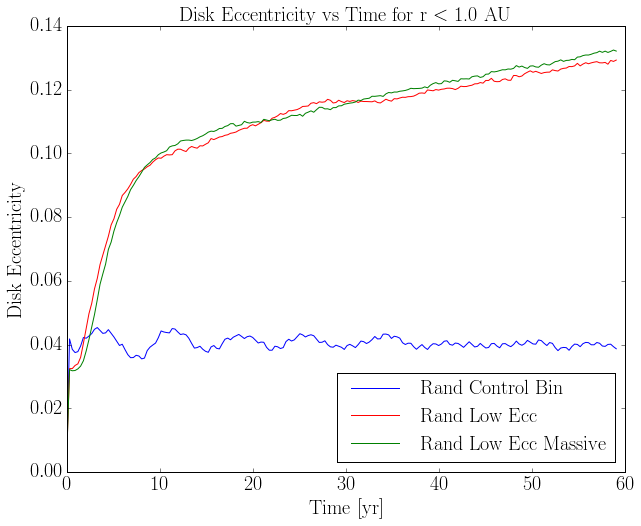

In [8]:
plt.plot(rand_control_time,rand_control_EccAvg,color='blue',label='Rand Control Bin')
plt.plot(rand_lowEcc_time,rand_lowEcc_EccAvg,color='red',label="Rand Low Ecc")
plt.plot(rand_lowEccMassive_time,rand_lowEccMassive_EccAvg,color='green',label='Rand Low Ecc Massive')

plt.xlabel("Time [yr]")
plt.ylabel('Disk Eccentricity')
plt.title("Disk Eccentricity vs Time for r $<$ 1.0 AU")
plt.legend(loc='lower right')
#plt.savefig("avgDiskEcc.pdf")